In [1]:
pip install PyWavelets

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

     -------------------------------------- 38.1/38.1 MB 721.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [43]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
img = cv2.imread("D:/Josiah VIT/SET project/Sports person Classifier/Model/test_images/Ronaldo.png")
img.shape

(350, 350, 3)

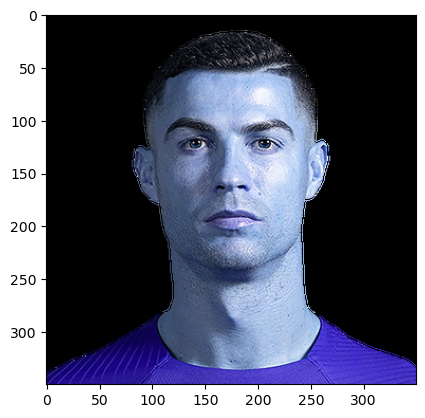

In [45]:
plt.imshow(img)

In [46]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(350, 350)

In [47]:
gray

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [ 42,  37,  29, ..., 106, 109, 104],
       [ 41,  30,  68, ..., 102, 101,  97],
       [ 32,  58,  86, ..., 106, 100, 104]], dtype=uint8)

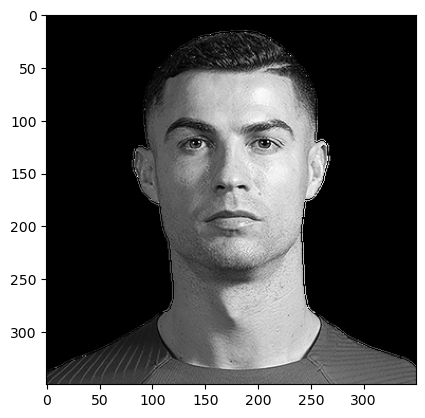

In [48]:
 plt.imshow(gray, cmap ='gray')

In [49]:
face_cascade = cv2.CascadeClassifier("D:/Josiah VIT/SET project/Sports person Classifier/Model/haar_cascade/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("D:/Josiah VIT/SET project/Sports person Classifier/Model/haar_cascade/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 87,  52, 177, 177]])

In [50]:
(x,y,w,h) = faces[0]
x,y,w,h

(87, 52, 177, 177)

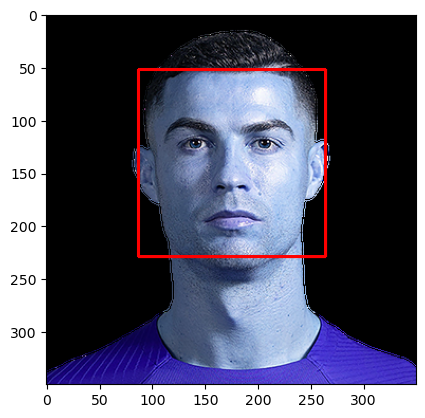

In [51]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

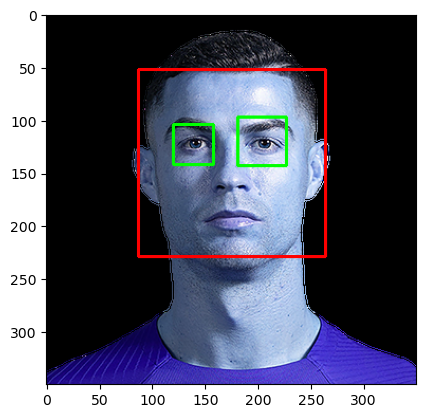

In [52]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

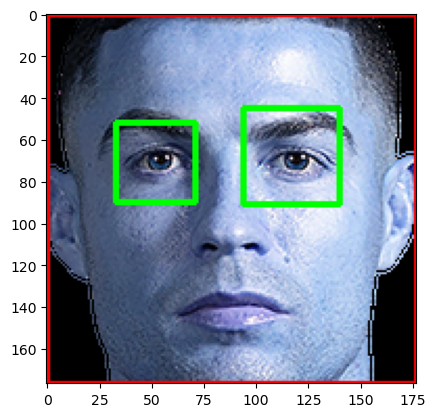

In [53]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [54]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

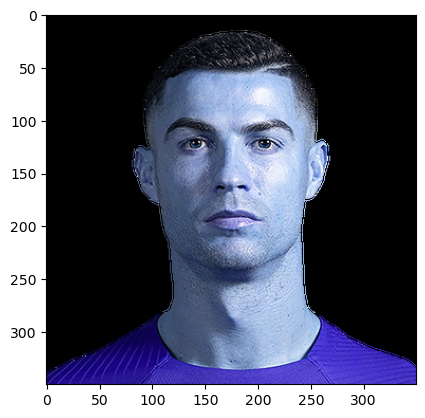

In [55]:
original_image = cv2.imread('D:/Josiah VIT/SET project/Sports person Classifier/Model/test_images/Ronaldo.png')
plt.imshow(original_image)

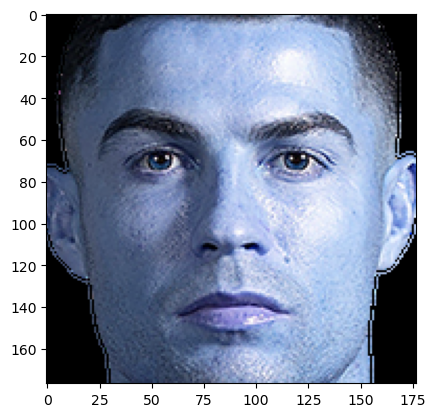

In [56]:
cropped_image = get_cropped_image_if_2_eyes('D:/Josiah VIT/SET project/Sports person Classifier/Model/test_images/Ronaldo.png')
plt.imshow(cropped_image)

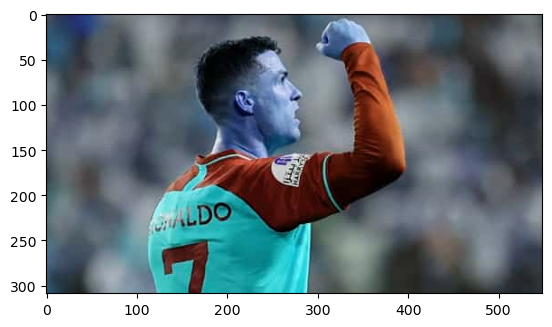

In [58]:
org_image_obstructed = cv2.imread("D:/Josiah VIT/SET project/Sports person Classifier/Model/test_images/ronaldo2.jpeg")
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("D:/Josiah VIT/SET project/Sports person Classifier/Model/test_images/ronaldo2.jpeg")
cropped_image_no_2_eyes

In [17]:
path_to_data = "D:/Josiah VIT/SET project/Sports person Classifier/Model/dataset/"
path_to_cr_data = "D:/Josiah VIT/SET project/Sports person Classifier/Model/dataset/cropped/"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['D:/Josiah VIT/SET project/Sports person Classifier/Model/dataset/Cristiano_Ronaldo',
 'D:/Josiah VIT/SET project/Sports person Classifier/Model/dataset/cropped',
 'D:/Josiah VIT/SET project/Sports person Classifier/Model/dataset/Kobe_Bryant',
 'D:/Josiah VIT/SET project/Sports person Classifier/Model/dataset/Maria_Sharapova',
 'D:/Josiah VIT/SET project/Sports person Classifier/Model/dataset/Novak_Djokovic',
 'D:/Josiah VIT/SET project/Sports person Classifier/Model/dataset/Virat_Kohli']

In [110]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Cristiano_Ronaldo
cropped


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [62]:
celebrity_file_names_dict = {'Cristiano_Ronaldo':["D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo1.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo2.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo3.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo4.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo5.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo6.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo7.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo8.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo9.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo10.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo11.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo12.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo13.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo14.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo15.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo16.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo17.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo18.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo19.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo20.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo21.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo22.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo23.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo24.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo25.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo26.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo27.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo28.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo29.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo30.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo31.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo32.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo33.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo34.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo35.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo36.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo37.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo38.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo40.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo41.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo42.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo43.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo44.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo45.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo46.png",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Cristiano_Ronaldo\Cristiano_Ronaldo47.png"],
'Kobe_Bryant':["D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant1.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant2.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant3.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant4.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant5.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant6.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant7.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant8.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant9.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant10.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant11.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant12.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant13.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant14.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant15.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant16.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant17.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant18.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant19.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant20.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant21.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant22.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant23.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant24.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant25.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant26.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant27.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant28.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Kobe_Bryant\Kobe_Bryant29.jpeg"],
'Maria_Sharapova':["D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova1.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova2.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova3.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova4.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova5.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova7.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova8.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova9.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova10.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova11.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova12.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova13.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova14.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova15.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova16.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova17.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova18.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova19.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova20.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova21.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova22.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova23.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova24.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova25.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova26.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova27.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova28.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova29.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova30.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova31.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova32.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova33.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova34.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova35.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova36.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Maria_Sharapova\Maria_Sharapova37.jpeg"],
'Novak_Djokovic':["D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic1.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic2.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic3.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic4.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic5.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic6.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic7.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic8.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic9.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic10.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic11.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic12.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic13.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic14.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic15.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic16.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic17.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic18.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic19.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic20.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic21.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic22.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic23.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic24.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic25.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic26.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic27.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic28.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped//Novak_Djokovic//Novak_Djokovic29.jpeg"],
'Virat_Kohli':["D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli1.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli2.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli3.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli4.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli5.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli6.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli7.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli8.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli9.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli10.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli11.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli12.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli13.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli14.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli15.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli16.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli17.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli18.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli19.jpeg",
"D:\Josiah VIT\SET project\Sports person Classifier\Model\dataset\cropped\Virat_Kohli\Virat_Kohli20.jpeg"]}


In [36]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

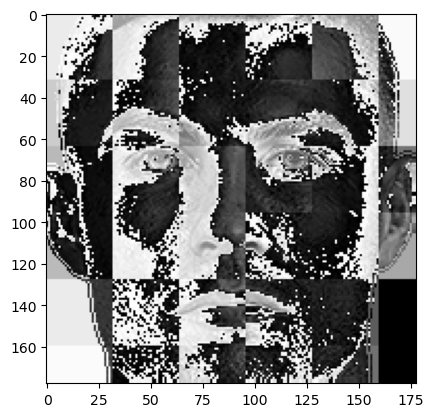

In [60]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [63]:
celebrity_file_names_dict

{'Cristiano_Ronaldo': ['D:\\Josiah VIT\\SET project\\Sports person Classifier\\Model\\dataset\\cropped\\Cristiano_Ronaldo\\Cristiano_Ronaldo1.png',
  'D:\\Josiah VIT\\SET project\\Sports person Classifier\\Model\\dataset\\cropped\\Cristiano_Ronaldo\\Cristiano_Ronaldo2.png',
  'D:\\Josiah VIT\\SET project\\Sports person Classifier\\Model\\dataset\\cropped\\Cristiano_Ronaldo\\Cristiano_Ronaldo3.png',
  'D:\\Josiah VIT\\SET project\\Sports person Classifier\\Model\\dataset\\cropped\\Cristiano_Ronaldo\\Cristiano_Ronaldo4.png',
  'D:\\Josiah VIT\\SET project\\Sports person Classifier\\Model\\dataset\\cropped\\Cristiano_Ronaldo\\Cristiano_Ronaldo5.png',
  'D:\\Josiah VIT\\SET project\\Sports person Classifier\\Model\\dataset\\cropped\\Cristiano_Ronaldo\\Cristiano_Ronaldo6.png',
  'D:\\Josiah VIT\\SET project\\Sports person Classifier\\Model\\dataset\\cropped\\Cristiano_Ronaldo\\Cristiano_Ronaldo7.png',
  'D:\\Josiah VIT\\SET project\\Sports person Classifier\\Model\\dataset\\cropped\\Cristia

In [64]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Cristiano_Ronaldo': 0,
 'Kobe_Bryant': 1,
 'Maria_Sharapova': 2,
 'Novak_Djokovic': 3,
 'Virat_Kohli': 4}

In [65]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [66]:
len(X[0])

4096

In [67]:
32*32*3 + 32*32

4096

In [68]:
X[0]

array([[172],
       [157],
       [140],
       ...,
       [  4],
       [  4],
       [  0]], dtype=uint8)

In [69]:
y[0]

0

In [70]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(160, 4096)

In [71]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.625

In [73]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.43      0.90      0.58        10
           1       0.83      0.56      0.67         9
           2       0.75      0.67      0.71         9
           3       1.00      0.33      0.50         9
           4       1.00      0.67      0.80         3

    accuracy                           0.62        40
   macro avg       0.80      0.62      0.65        40
weighted avg       0.76      0.62      0.63        40



In [74]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [75]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [76]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.783333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.600000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.758333,{'logisticregression__C': 1}


In [77]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [78]:
best_estimators['svm'].score(X_test,y_test)

0.75

In [79]:
best_estimators['random_forest'].score(X_test,y_test)

0.575

In [80]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.775

In [81]:
best_clf = best_estimators['svm']

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[9, 0, 0, 1, 0],
       [2, 4, 1, 2, 0],
       [1, 0, 8, 0, 0],
       [1, 0, 2, 6, 0],
       [0, 0, 0, 0, 3]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

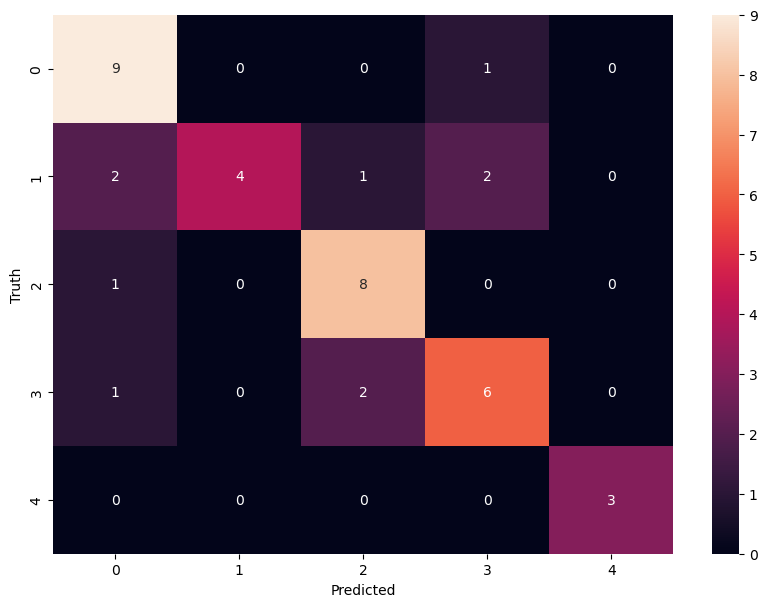

In [83]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [84]:
class_dict

{'Cristiano_Ronaldo': 0,
 'Kobe_Bryant': 1,
 'Maria_Sharapova': 2,
 'Novak_Djokovic': 3,
 'Virat_Kohli': 4}

In [85]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [86]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))